In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### import dataset

In [2]:
df=pd.read_csv('D:\\vibhav\\Upgrad\\Linear Regression\\CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


### DATA PREPARATION|

In [4]:
list_value=[]
for i in df['CarName']:
    if (str(i).split(' ')[0])=='toyouta':
        list_value.append('toyota')
    elif(str(i).split(' ')[0])=='porcshce':
        list_value.append('porsche')
    elif(str(i).split(' ')[0])=='vokswagen':
        list_value.append('volkswagen')
    else:
        list_value.append(str(i).split(' ')[0])
df['CarName']=list_value
df['cylindernumber']=df['cylindernumber'].map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
df['doornumber']=df['doornumber'].map({'two':2,'four':4})
df['fueltype']=df['fueltype'].map({'gas':1,'diesel':0})
df['aspiration']=df['aspiration'].map({'std':1,'turbo':0})
df['enginelocation']=df['enginelocation'].map({'front':1,'rear':0})

### #### create dummy variable

In [5]:
enginetype=pd.get_dummies(df['enginetype'],prefix='enginetype').iloc[:,1:]
df = pd.concat([df,enginetype],axis=1)
df.drop(['enginetype'],axis=1,inplace=True)
fuelsystem=pd.get_dummies(df['fuelsystem'],prefix='fuelsystem').iloc[:,1:]
df=pd.concat([df,fuelsystem],axis=1)
df.drop(['fuelsystem'],axis=1,inplace=True)
carbody=pd.get_dummies(df['carbody'],prefix='carbody').iloc[:,1:]
df=pd.concat([df,carbody],axis=1)
df.drop(['carbody'],axis=1,inplace=True)
drivewheel=pd.get_dummies(df['drivewheel'],prefix='drivewheel').iloc[:,1:]
df=pd.concat([df,drivewheel],axis=1)
df.drop(['drivewheel'],axis=1,inplace=True)
CarName=pd.get_dummies(df['CarName'],prefix='CarName').iloc[:,1:]
df=pd.concat([df,CarName],axis=1)
df.drop(['CarName'],axis=1,inplace=True)
df

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,CarName_vw
0,1,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,2,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,1,4,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,1,4,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0
5,6,2,1,1,2,1,99.8,177.3,66.3,53.1,...,0,0,0,0,0,0,0,0,0,0
6,7,1,1,1,4,1,105.8,192.7,71.4,55.7,...,0,0,0,0,0,0,0,0,0,0
7,8,1,1,1,4,1,105.8,192.7,71.4,55.7,...,0,0,0,0,0,0,0,0,0,0
8,9,1,1,0,4,1,105.8,192.7,71.4,55.9,...,0,0,0,0,0,0,0,0,0,0
9,10,0,1,0,2,1,99.5,178.2,67.9,52.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#splitting data into training set and testing set

In [34]:
X=df.columns.values.tolist()
X.remove('price')
X=df[X]
Y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8 ,test_size = 0.2,random_state=100)

### 25 variables are choosen from 64 variables using RFE 

In [35]:
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False False  True False  True False False  True False False False
 False  True False False False False False False  True  True False  True
 False  True False  True False False False False False  True  True  True
  True  True False False False  True  True False False False False  True
  True False False  True False  True False  True  True  True  True False
  True False False]
[27 30  6  1 35  1 29 34  1 22 36  2 24  1 15  8 31 37 32 33  1  1 26  1
 23  1 20  1  7  3 21 19 39  1  1  1  1  1 28 25 14  1  1 12  9 13 18  1
  1  5 38  1 11  1 10  1  1  1  1  4  1 17 16]


### Training model is built

In [39]:
col = X_train.columns[rfe.support_]
#col=col.drop(['cylindernumber','compressionratio','fuelsystem_idi','enginetype_dohcv','CarName_isuzu','fuelsystem_4bbl','fuelsystem_spfi','enginelocation','carbody_hardtop','CarName_subaru','CarName_honda'])
col=col.drop(['aspiration','carbody_wagon','carbody_hatchback','carbody_sedan','CarName_subaru','CarName_volkswagen','CarName_mitsubishi','CarName_peugeot','CarName_renault','boreratio','enginetype_dohcv','CarName_maxda','fuelsystem_4bbl','enginetype_rotor','enginelocation'])
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     106.8
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           9.30e-64
Time:                        21:23:30   Log-Likelihood:                -1529.3
No. Observations:                 164   AIC:                             3081.
Df Residuals:                     153   BIC:                             3115.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.281e+04   8902.747    -

In [40]:
df_filtered=df.loc[:,['carwidth','enginetype_l','enginetype_ohcf','carbody_hardtop','drivewheel_fwd','CarName_bmw','CarName_buick','CarName_jaguar','CarName_porsche','CarName_saab','price']]
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)
print(vif_cal(input_data=df_filtered,dependent_col="price"))


               Var   Vif
0         carwidth  4.22
4   drivewheel_fwd  3.33
8  CarName_porsche  1.28
3  carbody_hardtop  1.23
6    CarName_buick  1.23
1     enginetype_l  1.22
2  enginetype_ohcf  1.22
5      CarName_bmw  1.17
7   CarName_jaguar  1.07
9     CarName_saab  1.05


#### Making Predictions

In [41]:
X_test[col]
#Now lets use model to make predictions

X_test_rfe=X_test[col]

# #Adding a constraint variable

X_test_rfe = sm.add_constant(X_test_rfe)
# #Making predictions
y_pred=lm.predict(X_test_rfe)
y_pred

160     8023.314507
186     9801.653572
59     11418.325449
165    10657.472433
140    10241.466040
64     11418.325449
198    15830.822440
75     17124.159941
172    13244.147436
104    16962.492754
200    18579.164631
136    15326.666667
111    16222.059563
41      9316.652009
73     32221.337502
31      7214.978569
156     8023.314507
133    15326.666667
65     14052.483375
83     11094.991074
195    15830.822440
197    15830.822440
126    27345.165563
118     7053.311381
167    13986.890164
101    11418.325449
124    14375.817750
69     30700.739602
11     23832.767965
46     12597.478686
77      8023.314507
15     27227.778907
110    16222.059563
201    18417.497443
115    16222.059563
174    11418.325449
134    15326.666667
169    13244.147436
92      7053.311381
173    11418.325449
74     33449.081793
dtype: float64

#### Model Evaluation

In [31]:
# Now let's check how well our model is able to make predictions.

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0,0.5,'Car Price')

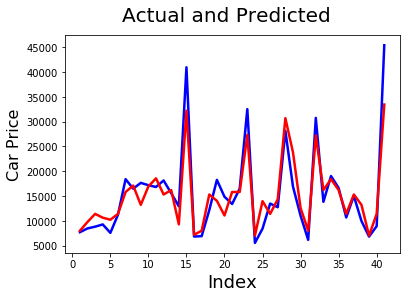

In [32]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,42,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

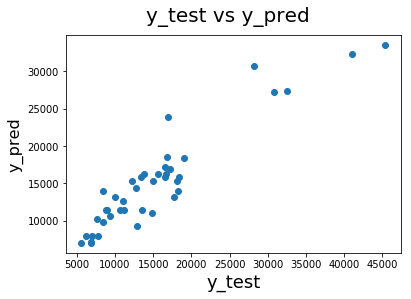

In [42]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label